In [47]:
# The libraries needed
import pandas as pd
import numpy as np

# read the file with the pin codes
df=pd.read_csv('Pin_Code.csv')

# adding 'in' becaise the pin codes were from India and doing this gave accurate results
df['Pin code msub'] = 'in ' + df['Pin code msub'].astype(str)
from geopy.geocoders import Nominatim

#our lat-long finder function
def pcode(address):
    geolocator = Nominatim(user_agent="Your_Name", timeout = 200)
    location = geolocator.geocode(address)
    
    #print(location.address)
    if location  == None:
        a = None
        b = None
    else:
        a=location.latitude
        b=location.longitude
    return (a,b)
    
df['lat']=np.nan
df['long']=np.nan
n=len(df['Pin code msub'])

#Tried doing this with pandas only but that gave NoneType vlaues
for i in range (0,n):
    df['lat'][i]=pcode(df['Pin code msub'][i])[0]
    df['long'][i]=pcode(df['Pin code msub'][i])[1]

#Saving to csv
df.to_csv('lat_long.csv')


C:\Users\ranja\AppData\Local\Temp\ipykernel_27840\3989142053.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ranja\AppData\Local\Temp\ipykernel_27840\3989142053.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df.isna().sum()

Pin code msub    0
lat              1
long             1
dtype: int64

In [3]:
if a is int:
    print("true")

NameError: name 'a' is not defined

In [49]:
from scipy.spatial.distance import pdist, squareform

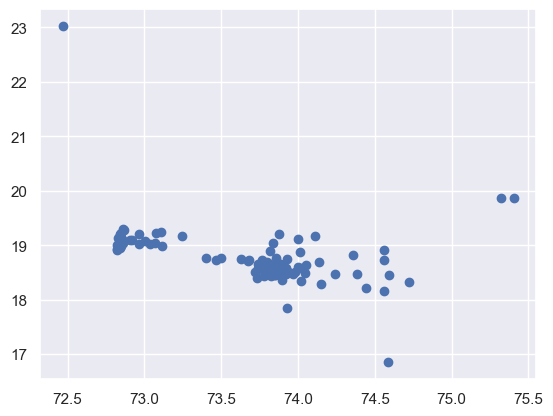

In [50]:
import matplotlib.pyplot as plt
plt.scatter(x=df['long'], y=df['lat'])
plt.show()

In [51]:
from shapely.geometry import Point

In [52]:
import geopandas as gpd
from geopandas import GeoDataFrame

In [53]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

In [54]:
gdf = GeoDataFrame(df, geometry=geometry)  

C:\Users\ranja\AppData\Local\Temp\ipykernel_27840\397159180.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



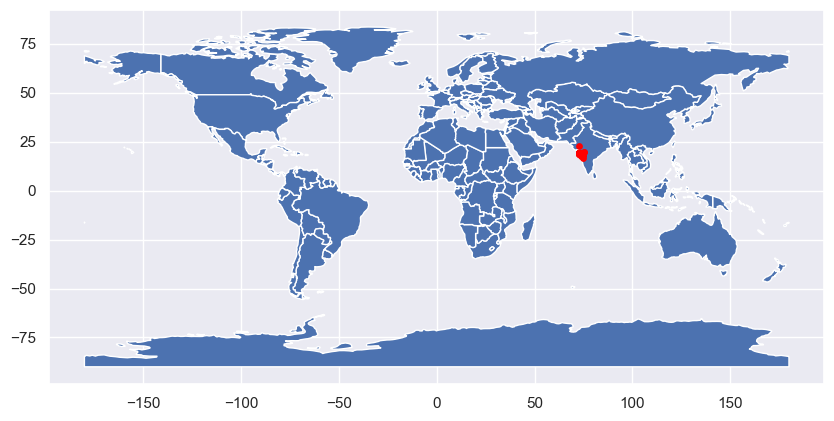

In [55]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [56]:
import plotly.express as px

In [57]:
fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="long",
                        zoom=8, 
                        height=800,
                        width=800)

In [58]:
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [60]:
df.isnull().values.any()

True

In [61]:
df[df['lat'].isna()]

,Pin code msub,lat,long
57,in 411202,NaN,NaN


In [62]:
df['lat'] = df['lat'].fillna(df['lat'].mode()[0])

In [63]:
df['long'] = df['long'].fillna(df['long'].mode()[0])

In [19]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['lat']]
X_axis = df[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

In [20]:
score

[-36.8427791189215,
 -18.18808316695697,
 -8.850339416647541,
 -3.2810026857547765,
 -2.138831184429343,
 -1.2759680374118045,
 -0.7989941695955641,
 -0.5102469236630357,
 -0.3457285514757966]

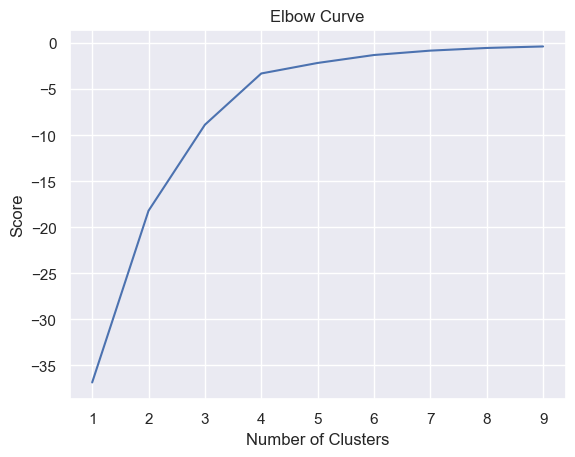

In [21]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
X=df

In [23]:
kmeans.fit(X[X.columns[2:3]]) # Compute k-means clustering.

KMeans(n_clusters=4)

In [24]:
X['cluster_label'] = kmeans.fit_predict(X[X.columns[2:3]])


In [25]:
labels = kmeans.predict(X[X.columns[2:3]]) # Labels of each point
X.head(10)

,Pin code msub,lat,long,cluster_label
0,in 411007,18.557894,73.812786,0
1,in 411060,18.465146,73.913652,0
2,in 412101,18.657886,73.740142,0
3,in 411030,18.508787,73.847509,0
4,in 411021,18.529749,73.775417,0
5,in 411062,18.664961,73.804903,0
6,in 411052,18.497429,73.816215,0
7,in 411004,18.515684,73.835426,0
8,in 412106,18.752018,73.630605,0
9,in 411040,18.492341,73.899074,0


<AxesSubplot: xlabel='lat', ylabel='long'>

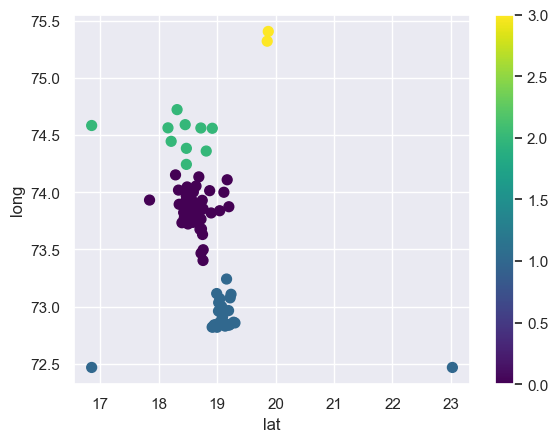

In [26]:
X.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')

In [27]:
from geopy.distance import geodesic as GD

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import folium

In [39]:
df

,Pin code msub,lat,long,cluster_label
0,in 411007,18.557894,73.812786,0
1,in 411060,18.465146,73.913652,0
2,in 412101,18.657886,73.740142,0
3,in 411030,18.508787,73.847509,0
4,in 411021,18.529749,73.775417,0
...,...,...,...,...
110,in 416416,16.855902,74.582854,2
111,in 400602,19.196867,72.965888,1
112,in 412303,18.289860,74.151454,0
113,in 400034,19.024795,72.961734,1


In [73]:
x=df[['lat','long']]

In [74]:
model = KMeans(n_clusters=4)
y_kmeans = model.fit_predict(x)

In [75]:
df['y'] = y_kmeans


C:\Users\ranja\AppData\Local\Temp\ipykernel_27840\1508937516.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df.y.unique()

array([0, 1, 3, 2])

In [77]:
df

,Pin code msub,lat,long,y
0,in 411007,18.557894,73.812786,0
1,in 411060,18.465146,73.913652,0
2,in 412101,18.657886,73.740142,0
3,in 411030,18.508787,73.847509,0
4,in 411021,18.529749,73.775417,0
...,...,...,...,...
110,in 416416,16.855902,74.582854,0
111,in 400602,19.196867,72.965888,1
112,in 412303,18.289860,74.151454,0
113,in 400034,19.024795,72.961734,1


In [78]:
model.inertia_


17.07748670654258

In [79]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

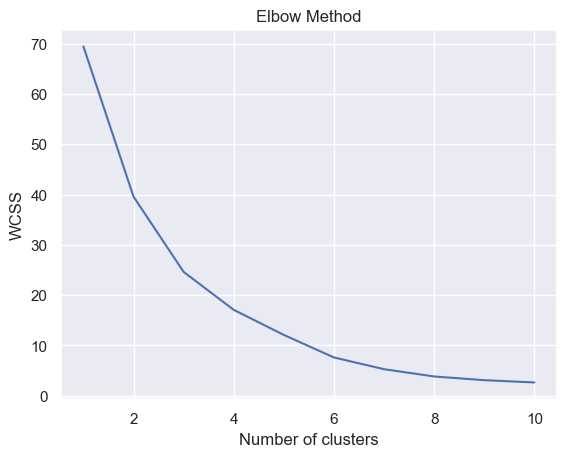

In [80]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [90]:
cluster1 = df[['lat', "long"]][df['y'] == 0].values.tolist()
cluster2 = df[['lat', "long"]][df['y'] == 1].values.tolist()
cluster3 = df[['lat', "long"]][df['y'] == 2].values.tolist()
cluster4 = df[['lat', "long"]][df['y'] == 3].values.tolist()

In [91]:
map = folium.Map(location=[19.196867, 73.812786], zoom_start=10,tiles = "openstreetmap")


In [92]:
map

In [93]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)
    
for i in cluster4:
    folium.CircleMarker(i, radius=2,color='cyan',fill_color='lightgreen').add_to(map)


In [94]:
map
